### 1) Overall configurations

In [35]:
import sys

import pandas as pd
sys.path.append( '../slevelsutil/' )

import request_track_util as rtrack
from Instance import Instance
from ResultTripServiceLevel import ResultTripServiceLevel

### 2) Loading the instance data

In [36]:
test_case = "standard_vs_enforce_BB"
instance_settings_path = "C:/Users/LocalAdmin/IdeaProjects/slevels/src/main/resources/week/enforce_service_levels.json"
data_dict_path = "../data/dictionary/request_track_data_dictionary.json"

instance = Instance(test_case, instance_settings_path, data_dict_path)
tripdata = ResultTripServiceLevel(instance)

In [37]:

figure_name_box_plot = "boxplot_pickup_waiting_serviced.pdf"
fig_boxplot_filepath = f'{instance.paper_folder}{test_case}_{figure_name_box_plot}'

df_summary_class = tripdata.df_summary_class

         Status             Policy  SQ Class  Count
0      Serviced  Enforce SL + Hire  Business   6603
1      Serviced  Enforce SL + Hire  Standard  28555
2      Serviced  Enforce SL + Hire  Low-cost   6768
3      Serviced         Enforce SL  Business   6171
4      Serviced         Enforce SL  Standard  24245
5      Serviced         Enforce SL  Low-cost   6299
6      Serviced       Min. waiting  Business   6570
7      Serviced       Min. waiting  Standard  23811
8      Serviced       Min. waiting  Low-cost   5360
9      Rejected  Enforce SL + Hire  Business      0
10     Rejected  Enforce SL + Hire  Standard     26
11     Rejected  Enforce SL + Hire  Low-cost      5
12     Rejected         Enforce SL  Business    432
13     Rejected         Enforce SL  Standard   4336
14     Rejected         Enforce SL  Low-cost    474
15     Rejected       Min. waiting  Business     33
16     Rejected       Min. waiting  Standard   4770
17     Rejected       Min. waiting  Low-cost   1413
18   First-t

In [38]:
tripdata.df_serviced[tripdata.df_serviced[instance.headers["class"]] == instance.dict_sl_class["A"]].describe()

,Pickup waiting (min),deviation
count,19344.000000,19344.000000
mean,160.831782,33.551747
std,104.486647,71.179011
min,1.000000,0.000000
25%,88.000000,0.000000
50%,136.000000,0.000000
75%,178.000000,0.000000
max,420.000000,240.000000


Plotting expected  {'Business': 180, 'Standard': 300, 'Low-cost': 420}
('Business', 'Standard', 'Low-cost') (180, 300, 420)
saving at C:/Users/LocalAdmin/OneDrive/leap_forward/phd_project/sqc/business_class_amod/standard_vs_enforce_BB_boxplot_pickup_waiting_serviced.pdf


<Figure size 432x288 with 0 Axes>

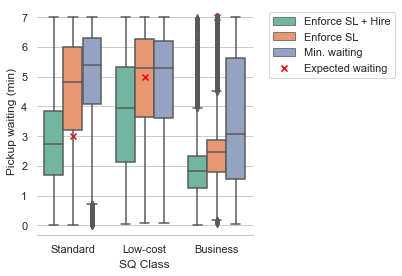

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")
sns.despine(left=True)
import numpy as np

fig, ax = plt.subplots(1,1)
g = sns.boxplot(
    x=instance.headers["class"],
    y=instance.headers["delay_pk"],
    hue=instance.headers["method"],
    data=tripdata.df_serviced,
    palette="Set2",
    ax=ax)


print("Plotting expected ", instance.sl_class_target_pickup)
x,y = list(zip(*instance.sl_class_target_pickup.items()))
print(x,y)
ax.scatter(x, y, marker="x", color="red", label="Expected waiting")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.tight_layout()

_ = ax.set_yticks(np.arange(0, 480, 60))
_ = ax.set_yticklabels(np.arange(0, 8))

sns.despine(left=True)

print("saving at", fig_boxplot_filepath)
plt.savefig(fig_boxplot_filepath, bbox_inches="tight")

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style(
    "whitegrid", {
        'xtick.bottom': True,
        'xtick.top': False,
        'ytick.left': False,
        'ytick.right': False
    }
)
sns.set_context("paper")
sns.despine(left=True)

<Figure size 432x288 with 0 Axes>

In [41]:
df_rejected_method_class = tripdata.df_rejected_method_class

         Status             Policy  SQ Class  Count
0      Serviced  Enforce SL + Hire  Business   6603
1      Serviced  Enforce SL + Hire  Standard  28555
2      Serviced  Enforce SL + Hire  Low-cost   6768
3      Serviced         Enforce SL  Business   6171
4      Serviced         Enforce SL  Standard  24245
5      Serviced         Enforce SL  Low-cost   6299
6      Serviced       Min. waiting  Business   6570
7      Serviced       Min. waiting  Standard  23811
8      Serviced       Min. waiting  Low-cost   5360
9      Rejected  Enforce SL + Hire  Business      0
10     Rejected  Enforce SL + Hire  Standard     26
11     Rejected  Enforce SL + Hire  Low-cost      5
12     Rejected         Enforce SL  Business    432
13     Rejected         Enforce SL  Standard   4336
14     Rejected         Enforce SL  Low-cost    474
15     Rejected       Min. waiting  Business     33
16     Rejected       Min. waiting  Standard   4770
17     Rejected       Min. waiting  Low-cost   1413
18   First-t

Count rejected

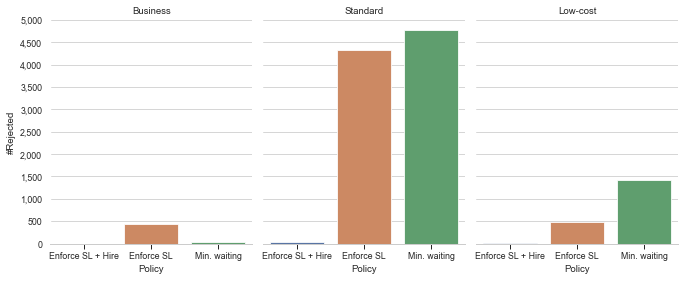

In [42]:
g = sns.catplot(
    kind="bar",
    x=instance.headers["method"],
    y="Count",
    col=instance.headers["class"],
    data=df_rejected_method_class,
    col_order=instance.order_classes,
    order = instance.order_methods_dict.keys(),
    height=4,
    aspect=0.8,
)

g = rtrack.add_ticks(g, 0, 5500, 500, tick_format="{:,}")
plt.tight_layout()
g = g.set_axis_labels(instance.headers["method"], "#Rejected")
g = g.set_titles("{col_name}")

figure_name_bar = "grid_rejected_bar.pdf"
sns.despine(left=True)
plt.show()